# NYCDSA Machine Learning Project - House Prices

# Step 1. EDA & Imputation

---
## Project Description

For this project, the goal task is to employ machine learning techniques to understand what factors contribute to house values.

### Project Outline
- Step 1. Exploratory data analysis & Imputation
- Step 2. Gradient boosting model & Feature selection
- Step 3. Factor analysis of the features
- Step 4. Gradient boosting model with factors

## EDA

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sn

from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 250)

In [2]:
train_raw = pd.read_csv('../data/train.csv')
print(train_raw.shape)
train_raw.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train_raw.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Investigate Missingness

In [5]:
# Observe missingness
missingRows = train_raw[train_raw.isnull().any(axis=1)].index
missingCols = train_raw.columns[train_raw.isnull().any()]

print('The columns with missingness are: %s' % (list(missingCols)))
print('Number of rows with missingness are: %s (%s %%)' % (len(missingRows), len(missingRows)/train_raw.shape[0]*100))

The columns with missingness are: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Number of rows with missingness are: 1460 (100.0 %)


In [6]:
# How many missing values per col?
import plotly.graph_objects as go

missingNs = [0] * len(list(missingCols))
for idx, col in enumerate(list(missingCols)):
    missingNs[idx] = train_raw[col].isnull().sum()

data_missing = pd.DataFrame(list(missingCols))
data_missing.columns = ['ColumnName']
data_missing['MissingValues'] = missingNs
data_missing['PercMissing'] = np.round(np.array(missingNs)/train_raw.shape[0]*100,2)
data_missing.sort_values(['PercMissing'],ascending=False)

,ColumnName,MissingValues,PercMissing
16,PoolQC,1453,99.52
18,MiscFeature,1406,96.30
1,Alley,1369,93.77
17,Fence,1179,80.75
10,FireplaceQu,690,47.26
0,LotFrontage,259,17.74
11,GarageType,81,5.55
12,GarageYrBlt,81,5.55
13,GarageFinish,81,5.55
14,GarageQual,81,5.55


Alley: NA = No alley access<br/>
Pool<br/>
Bsmt<br/>
Misc<br/>
Fireplace<br/>
Garage<br/>
Mas<br/>
Electrical<br/>
Fence<br/>
MasVnrArea, MasVnrType, GarageYrBlt, and Electrical are the columns with true missing value (1 missing)

### Impute the missing value

**LotFrontage** - 259 missing values

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

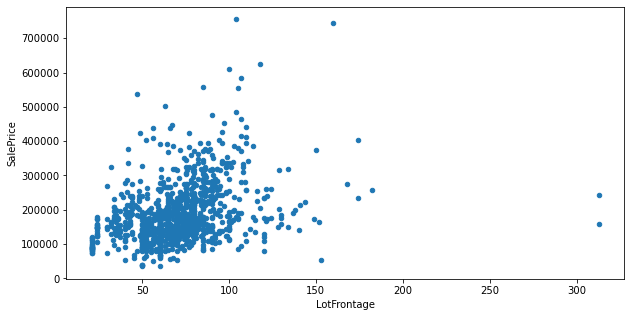

In [7]:
train_raw.plot(x='LotFrontage',y='SalePrice',kind='scatter')

<AxesSubplot:>

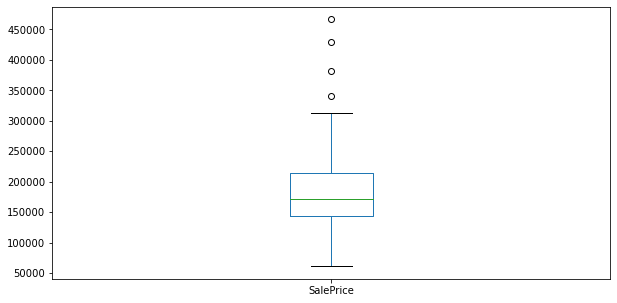

In [8]:
train_raw[train_raw.LotFrontage.isnull()].boxplot(column = ['SalePrice'],grid=False)

In [9]:
# Assign a large value for now
print(train_raw.LotFrontage.max())
print(train_raw.LotFrontage.min())
train_raw.LotFrontage[train_raw.LotFrontage.isnull()] = 1000000

313.0
21.0


/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**GarageYrBlt** - 81 missing values

In [10]:
train_raw.groupby(['GarageYrBlt']).SalePrice.agg(['mean','std','count']).reset_index()

,GarageYrBlt,mean,std,count
0,1900.0,133900.000000,NaN,1
1,1906.0,135000.000000,NaN,1
2,1908.0,240000.000000,NaN,1
3,1910.0,125000.000000,16643.316977,3
4,1914.0,150943.500000,17050.465815,2
5,1915.0,131200.000000,33658.282784,2
6,1916.0,126800.000000,18102.486017,5
7,1918.0,237000.000000,2828.427125,2
8,1920.0,109992.857143,56658.782526,14
9,1921.0,135800.000000,40757.453306,3


<AxesSubplot:xlabel='GarageYrBlt', ylabel='mean'>

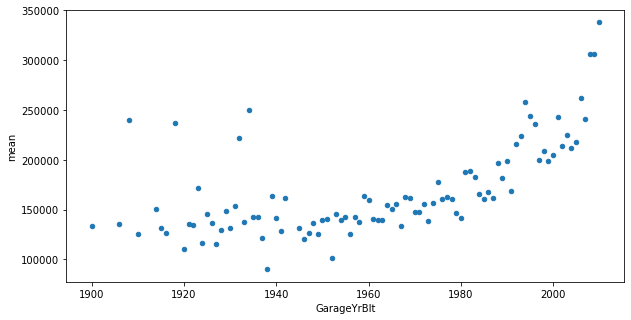

In [11]:
train_raw.groupby(['GarageYrBlt']).SalePrice.agg(['mean','std','count']).reset_index().plot(x='GarageYrBlt',y='mean',kind='scatter')

In [12]:
# Older garages are less expensive. 
# Missing values for the garage year built is associated with no garage, so its missing values will be 
# imputed using the oldest value minus 10 years.
train_raw.GarageYrBlt[train_raw.GarageYrBlt.isnull()] = train_raw.GarageYrBlt.min() - 10

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
train_raw.GarageYrBlt[train_raw.GarageYrBlt.isnull()] # Check that there's no more missing values in GarageYrBlt

Series([], Name: GarageYrBlt, dtype: float64)

**MasVnrArea, MasVnrType** - 8 missing values

<AxesSubplot:xlabel='MasVnrArea', ylabel='mean'>

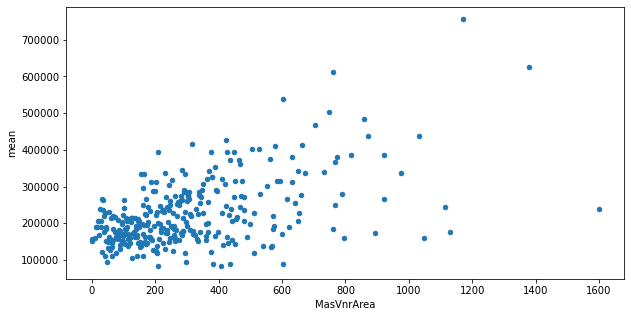

In [14]:
train_raw.groupby(['MasVnrArea']).SalePrice.agg(['mean','std','count']).reset_index().plot(x='MasVnrArea',y='mean',kind='scatter')

In [15]:
# Assign a large value to MasVnrArea for now
print(train_raw.MasVnrArea.max())
print(train_raw.MasVnrArea.min())
train_raw.MasVnrArea[train_raw.MasVnrArea.isnull()] = 1000000

1600.0
0.0


/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


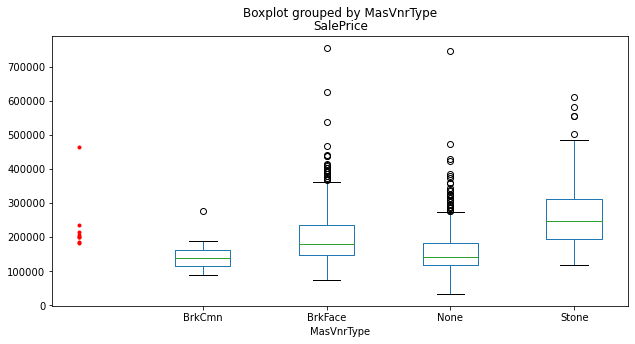

In [16]:
bp = train_raw.boxplot(column = ['SalePrice'], by = 'MasVnrType',grid=False)
plt.plot(['None']*8,train_raw.SalePrice[train_raw.MasVnrType.isnull()],'r.')

In [17]:
train_raw.SalePrice[train_raw.MasVnrType.isnull()]

234     216500
529     200624
650     205950
936     184900
973     182000
977     199900
1243    465000
1278    237000
Name: SalePrice, dtype: int64

In [18]:
# Will use kNN imputation along with the Electrial cat variable below.

In [19]:
train_raw[train_raw.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


Since there's only one missing values, it's very unlikely that imputation will impact the model fit. Hence, the imputation will be done by taking the mode from the houses with the same price. ==> Changing to kNN imputation later.

### Change NA values to NotAvail instead of null values

In [20]:
missingNs = [0] * len(list(missingCols))
for idx, col in enumerate(list(missingCols)):
    missingNs[idx] = train_raw[col].isnull().sum()

data_missing = pd.DataFrame(list(missingCols))
data_missing.columns = ['ColumnName']
data_missing['MissingValues'] = missingNs
data_missing['PercMissing'] = np.round(np.array(missingNs)/train_raw.shape[0]*100,2)
data_missing.sort_values(['PercMissing'],ascending=False)

,ColumnName,MissingValues,PercMissing
16,PoolQC,1453,99.52
18,MiscFeature,1406,96.30
1,Alley,1369,93.77
17,Fence,1179,80.75
10,FireplaceQu,690,47.26
15,GarageCond,81,5.55
11,GarageType,81,5.55
13,GarageFinish,81,5.55
14,GarageQual,81,5.55
6,BsmtExposure,38,2.60


In [21]:
for idx, col in enumerate(list(missingCols)):
    train_raw[col][train_raw[col].isnull()] = 'NotAvail'

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Need to convert nominal to hotcoding and ordinal to labelencoding. labelencoding cannot handle null entries, 
# so keep 'NotAvail' for now.

train_cat = train_raw.select_dtypes(["object","category"])
train_cont = train_raw.select_dtypes(["float64","int64"]) 
print(train_cat.columns)
print(train_cont.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 

In [23]:
columns_categorical = list(train_cat.columns)
%store columns_categorical

Stored 'columns_categorical' (list)


In [24]:
# Identify ordinal features
columns_ordinal = ['Alley','LotShape','LandContour',
                   'Utilities','LandSlope','ExterQual',
                   'ExterCond','BsmtQual','BsmtCond',
                   'BsmtExposure','BsmtFinType1',
                   'BsmtFinType2','HeatingQC',
                   'Electrical','KitchenQual',
                   'Functional','FireplaceQu',
                   'GarageFinish','GarageQual','GarageCond',
                   'PavedDrive','PoolQC','Fence']
cat_labels = [['Pave','Grvl','NotAvail'],['Reg','IR1','IR2','IR3'],['Lvl','Bnk','HLS','Low'],
              ['AllPub','NoSewr','NoSeWa','ELO'],['Gtl','Mod','Sev'],['Ex','Gd','TA','Fa','Po'],
              ['Ex','Gd','TA','Fa','Po'],['Ex','Gd','TA','Fa','Po','NotAvail'],['Ex','Gd','TA','Fa','Po','NotAvail'],
              ['Gd','Av','Mn','No','NotAvail'],['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NotAvail'],
              ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NotAvail'],['Ex','Gd','TA','Fa','Po'],
              ['SBrkr','FuseA','FuseF','FuseP','Mix','NotAvail'],['Ex','Gd','TA','Fa','Po'],
              ['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],['Ex','Gd','TA','Fa','Po','NotAvail'],
              ['Fin','RFn','Unf','NotAvail'],['Ex','Gd','TA','Fa','Po','NotAvail'],['Ex','Gd','TA','Fa','Po','NotAvail'],
              ['Y','P','N'],['Ex','Gd','TA','Fa','NotAvail'],['dPrv','MnPrv','GdWo','MnWw','NotAvail']]

print(len(columns_ordinal))
print(len(cat_labels))

23
23


In [25]:
train_label = train_raw.copy()
labelencoder = LabelEncoder()
for idx,col in enumerate(columns_ordinal):
    train_label[col] = labelencoder.fit_transform(train_cat[col])
    train_cat[col+'_Label'] = labelencoder.fit_transform(train_cat[col])
    
    for idx_i,label_i in enumerate(cat_labels[idx]):
        train_label[col][train_cat[col] == label_i] = len(cat_labels[idx]) - idx_i - 1
        train_cat[col+'_Label'][train_cat[col] == label_i] = len(cat_labels[idx]) - idx_i - 1

    print(train_cat[[col,col+'_Label']].drop_duplicates())

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

       Alley  Alley_Label
0   NotAvail            0
21      Grvl            1
30      Pave            2
    LotShape  LotShape_Label
0        Reg               3
2        IR1               2
12       IR2               1
264      IR3               0
   LandContour  LandContour_Label
0          Lvl                  3
21         Bnk                  2
53         Low                  0
58         HLS                  1
    Utilities  Utilities_Label
0      AllPub                3
944    NoSeWa                1
    LandSlope  LandSlope_Label
0         Gtl                2
52        Mod                1
120       Sev                0
   ExterQual  ExterQual_Label
0         Gd                3
1         TA                2
11        Ex                4
52        Fa                1
    ExterCond  ExterCond_Label
0          TA                2
24         Gd                3
30         Fa                1
250        Po                0
508        Ex                4


/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

    BsmtQual  BsmtQual_Label
0         Gd               4
3         TA               3
6         Ex               5
17  NotAvail               0
74        Fa               2
     BsmtCond  BsmtCond_Label
0          TA               3
3          Gd               4
17   NotAvail               0
61         Fa               2
375        Po               1
   BsmtExposure  BsmtExposure_Label
0            No                   1
1            Gd                   4
2            Mn                   2
4            Av                   3
17     NotAvail                   0
   BsmtFinType1  BsmtFinType1_Label
0           GLQ                   6
1           ALQ                   5
8           Unf                   1
10          Rec                   3
14          BLQ                   4
17     NotAvail                   0
19          LwQ                   2
   BsmtFinType2  BsmtFinType2_Label
0           Unf                   1
7           BLQ                   4
17     NotAvail                   

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

   GarageFinish  GarageFinish_Label
0           RFn                   2
3           Unf                   1
11          Fin                   3
39     NotAvail                   0
    GarageQual  GarageQual_Label
0           TA                 3
8           Fa                 2
9           Gd                 4
39    NotAvail                 0
185         Ex                 5
246         Po                 1
    GarageCond  GarageCond_Label
0           TA                 3
30          Fa                 2
39    NotAvail                 0
42          Gd                 4
246         Po                 1
268         Ex                 5
   PavedDrive  PavedDrive_Label
0           Y                 2
21          N                 0
41          P                 1
        PoolQC  PoolQC_Label
0     NotAvail             0
197         Ex             4
810         Fa             1
1170        Gd             3
        Fence  Fence_Label
0    NotAvail            0
5       MnPrv            3
14  

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

**Nominal Categorical features**
Convert to ordinal to impute first then dummify.

In [26]:
train_cat = train_raw.select_dtypes(["object","category"])
columns_nominal = list(set(train_cat.columns) ^ set(columns_ordinal))
columns_nominal

['MSZoning',
 'MiscFeature',
 'BldgType',
 'Exterior2nd',
 'Condition1',
 'RoofStyle',
 'Foundation',
 'RoofMatl',
 'HouseStyle',
 'Condition2',
 'Heating',
 'Street',
 'GarageType',
 'LotConfig',
 'Neighborhood',
 'SaleCondition',
 'CentralAir',
 'MasVnrType',
 'SaleType',
 'Exterior1st']

In [27]:
train_imp = train_label.copy()
labelencoder = LabelEncoder()
for idx,col in enumerate(columns_nominal):
    train_imp[col] = labelencoder.fit_transform(train_cat[col])
    train_cat[col+'_Label'] = labelencoder.fit_transform(train_cat[col])
    print(train_cat[[col,col+'_Label']].drop_duplicates())

    MSZoning  MSZoning_Label
0         RL               3
8         RM               4
30   C (all)               0
47        FV               1
341       RH               2
     MiscFeature  MiscFeature_Label
0       NotAvail                  1
5           Shed                  3
346         Gar2                  0
705         Othr                  2
1386        TenC                  4
   BldgType  BldgType_Label
0      1Fam               0
9    2fmCon               1
17   Duplex               2
23   TwnhsE               4
56    Twnhs               3
     Exterior2nd  Exterior2nd_Label
0        VinylSd                 13
1        MetalSd                  8
3        Wd Shng                 15
7        HdBoard                  6
12       Plywood                 10
15       Wd Sdng                 14
23       CmentBd                  5
30       BrkFace                  3
63        Stucco                 12
69       AsbShng                  0
195      Brk Cmn                  2
274      I

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [28]:
train_imp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,3,4,2,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,3,2,2,4,3,1,6,706,1,0,150,856,1,4,1,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,1,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,3,2,2,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,2,2,1,4,3,4,5,978,1,0,284,1262,1,4,1,5,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,3,1,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,0,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,2,3,3,4,2,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,3,2,2,4,3,2,6,486,1,0,434,920,1,4,1,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,3,1,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,0,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,2,3,3,0,2,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,2,2,0,3,4,1,5,216,1,0,540,756,1,3,1,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,4,5,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,0,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,2,3,3,2,2,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,3,2,2,4,3,3,6,655,1,0,490,1145,1,4,1,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,3,1,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,0,1,0,12,2008,8,4,250000


In [29]:
# insert nan back into the dataframe

##  LotFrontage
train_imp.LotFrontage[train_imp.LotFrontage == 1000000] = np.nan
## MasVnrArea
train_imp.MasVnrArea[train_imp.MasVnrArea == 1000000] = np.nan
## MasVnrType
train_imp.MasVnrType[train_imp.MasVnrType == 3] = np.nan
## Electrical
train_imp.Electrical[train_imp.Electrical == 0] = np.nan

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/koeun

In [30]:
train_imp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,3,4,2,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1.0,196.0,3,2,2,4,3,1,6,706,1,0,150,856,1,4,1,5.0,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,1,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,3,2,2,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2.0,0.0,2,2,1,4,3,4,5,978,1,0,284,1262,1,4,1,5.0,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,3,1,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,0,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,2,3,3,4,2,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1.0,162.0,3,2,2,4,3,2,6,486,1,0,434,920,1,4,1,5.0,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,3,1,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,0,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,2,3,3,0,2,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2.0,0.0,2,2,0,3,4,1,5,216,1,0,540,756,1,3,1,5.0,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,4,5,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,0,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,2,3,3,2,2,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1.0,350.0,3,2,2,4,3,3,6,655,1,0,490,1145,1,4,1,5.0,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,3,1,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,0,1,0,12,2008,8,4,250000


In [31]:
missingNs = [0] * len(list(missingCols))
for idx, col in enumerate(list(missingCols)):
    missingNs[idx] = train_imp[col].isnull().sum()

data_missing = pd.DataFrame(list(missingCols))
data_missing.columns = ['ColumnName']
data_missing['MissingValues'] = missingNs
data_missing['PercMissing'] = np.round(np.array(missingNs)/train_imp.shape[0]*100,2)
data_missing.sort_values(['PercMissing'],ascending=False)

,ColumnName,MissingValues,PercMissing
0,LotFrontage,259,17.74
3,MasVnrArea,8,0.55
2,MasVnrType,8,0.55
9,Electrical,1,0.07
4,BsmtQual,0,0.00
5,BsmtCond,0,0.00
6,BsmtExposure,0,0.00
7,BsmtFinType1,0,0.00
8,BsmtFinType2,0,0.00
1,Alley,0,0.00


**Impute missing values**

In [32]:
imputer = KNNImputer()
X_imp = train_imp.iloc[:,0:80]
imputer.fit(X_imp)
Xtrans = pd.DataFrame(imputer.transform(X_imp))
Xtrans.columns = X_imp.columns[0:80]
Xtrans

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,3.0,65.0,8450.0,1.0,0.0,3.0,3.0,3.0,4.0,2.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,1.0,196.0,3.0,2.0,2.0,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,1.0,4.0,1.0,5.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,8.0,7.0,0.0,0.0,1.0,2003.0,2.0,2.0,548.0,3.0,3.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2008.0,8.0,4.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,0.0,3.0,3.0,3.0,2.0,2.0,24.0,1.0,2.0,0.0,2.0,6.0,8.0,1976.0,1976.0,1.0,1.0,8.0,8.0,2.0,0.0,2.0,2.0,1.0,4.0,3.0,4.0,5.0,978.0,1.0,0.0,284.0,1262.0,1.0,4.0,1.0,5.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,2.0,6.0,7.0,1.0,3.0,1.0,1976.0,2.0,2.0,460.0,3.0,3.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2007.0,8.0,4.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,0.0,2.0,3.0,3.0,4.0,2.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,1.0,162.0,3.0,2.0,2.0,4.0,3.0,2.0,6.0,486.0,1.0,0.0,434.0,920.0,1.0,4.0,1.0,5.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,6.0,7.0,1.0,3.0,1.0,2001.0,2.0,2.0,608.0,3.0,3.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2008.0,8.0,4.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,0.0,2.0,3.0,3.0,0.0,2.0,6.0,2.0,2.0,0.0,5.0,7.0,5.0,1915.0,1970.0,1.0,1.0,13.0,15.0,2.0,0.0,2.0,2.0,0.0,3.0,4.0,1.0,5.0,216.0,1.0,0.0,540.0,756.0,1.0,3.0,1.0,5.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,7.0,7.0,1.0,4.0,5.0,1998.0,1.0,3.0,642.0,3.0,3.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2006.0,8.0,0.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,15.0,2.0,2.0,0.0,5.0,8.0,5.0,2000.0,2000.0,1.0,1.0,12.0,13.0,1.0,350.0,3.0,2.0,2.0,4.0,3.0,3.0,6.0,655.0,1.0,0.0,490.0,1145.0,1.0,4.0,1.0,5.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,3.0,9.0,7.0,1.0,3.0,1.0,2000.0,2.0,3.0,836.0,3.0,3.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,2008.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,62.0,7917.0,1.0,0.0,3.0,3.0,3.0,4.0,2.0,8.0,2.0,2.0,0.0,5.0,6.0,5.0,1999.0,2000.0,1.0,1.0,12.0,13.0,2.0,0.0,2.0,2.0,2.0,4.0,3.0,1.0,1.0,0.0,1.0,0.0,953.0,953.0,1.0,4.0,1.0,5.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,7.0,7.0,1.0,3.0,1.0,1999.0,2.0,2.0,460.0,3.0,3.0,2.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,2007.0,8.0,4.0
1456,1457.0,20.0,3.0,85.0,13175.0,1.0,0.0,3.0,3.0,3.0,4.0,2.0,14.0,2.0,2.0,0.0,2.0,6.0,6.0,1978.0,1988.0,1.0,1.0,9.0,10.0,4.0,119.0,2.0,2.0,1.0,4.0,3.0,1.0,5.0,790.0,3.0,163.0,589.0,1542.0,1.0,2.0,1.0,5.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,7.0,6.0,2.0,3.0,1.0,1978.0,1.0,2.0,500.0,3.0,3.0,2.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,2010.0,8.0,4.0
1457,1458.0,70.0,3.0,66.0,9042.0,1.0,0.0,3.0,3.0,3.0,4.0,2.0,6.0,2.0,2.0,0.0,5.0,7.0,9.0,1941.0,2006.0,1.0,1.0,5.0,5.0,2.0,0.0,4.0,3.0,4.0,3.0,4.0,1.0,6.0,275.0,1.0,0.0,877.0,1152.0,1.0,4.0,1.0,5.0,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,3.0,9.0,7.0,2.0,4.0,1.0,1941.0,2.0,1.0,252.0,3.0,3.

In [33]:
missingNs = [0] * len(list(missingCols))
for idx, col in enumerate(list(missingCols)):
    missingNs[idx] = Xtrans[col].isnull().sum()

data_missing = pd.DataFrame(list(missingCols))
data_missing.columns = ['ColumnName']
data_missing['MissingValues'] = missingNs
data_missing['PercMissing'] = np.round(np.array(missingNs)/Xtrans.shape[0]*100,2)
data_missing.sort_values(['PercMissing'],ascending=False)

,ColumnName,MissingValues,PercMissing
0,LotFrontage,0,0.0
10,FireplaceQu,0,0.0
17,Fence,0,0.0
16,PoolQC,0,0.0
15,GarageCond,0,0.0
14,GarageQual,0,0.0
13,GarageFinish,0,0.0
12,GarageYrBlt,0,0.0
11,GarageType,0,0.0
9,Electrical,0,0.0


In [34]:
Xtrans = Xtrans.drop(columns = 'Id')
X_label = Xtrans.copy()
Xtrans.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3.0,65.0,8450.0,1.0,0.0,3.0,3.0,3.0,4.0,2.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,1.0,196.0,3.0,2.0,2.0,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,1.0,4.0,1.0,5.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,8.0,7.0,0.0,0.0,1.0,2003.0,2.0,2.0,548.0,3.0,3.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2008.0,8.0,4.0
1,20.0,3.0,80.0,9600.0,1.0,0.0,3.0,3.0,3.0,2.0,2.0,24.0,1.0,2.0,0.0,2.0,6.0,8.0,1976.0,1976.0,1.0,1.0,8.0,8.0,2.0,0.0,2.0,2.0,1.0,4.0,3.0,4.0,5.0,978.0,1.0,0.0,284.0,1262.0,1.0,4.0,1.0,5.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,2.0,6.0,7.0,1.0,3.0,1.0,1976.0,2.0,2.0,460.0,3.0,3.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2007.0,8.0,4.0
2,60.0,3.0,68.0,11250.0,1.0,0.0,2.0,3.0,3.0,4.0,2.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,1.0,162.0,3.0,2.0,2.0,4.0,3.0,2.0,6.0,486.0,1.0,0.0,434.0,920.0,1.0,4.0,1.0,5.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,6.0,7.0,1.0,3.0,1.0,2001.0,2.0,2.0,608.0,3.0,3.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2008.0,8.0,4.0
3,70.0,3.0,60.0,9550.0,1.0,0.0,2.0,3.0,3.0,0.0,2.0,6.0,2.0,2.0,0.0,5.0,7.0,5.0,1915.0,1970.0,1.0,1.0,13.0,15.0,2.0,0.0,2.0,2.0,0.0,3.0,4.0,1.0,5.0,216.0,1.0,0.0,540.0,756.0,1.0,3.0,1.0,5.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,7.0,7.0,1.0,4.0,5.0,1998.0,1.0,3.0,642.0,3.0,3.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2006.0,8.0,0.0
4,60.0,3.0,84.0,14260.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,15.0,2.0,2.0,0.0,5.0,8.0,5.0,2000.0,2000.0,1.0,1.0,12.0,13.0,1.0,350.0,3.0,2.0,2.0,4.0,3.0,3.0,6.0,655.0,1.0,0.0,490.0,1145.0,1.0,4.0,1.0,5.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,3.0,9.0,7.0,1.0,3.0,1.0,2000.0,2.0,3.0,836.0,3.0,3.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,2008.0,8.0,4.0


**Dummify nominal features**

In [35]:
for idx, col in enumerate(columns_nominal):
    Xtrans = pd.get_dummies(Xtrans, columns=[col], prefix=[col], drop_first=True)

In [36]:
Xtrans.head()

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_1.0,MSZoning_2.0,MSZoning_3.0,MSZoning_4.0,MiscFeature_1.0,MiscFeature_2.0,MiscFeature_3.0,MiscFeature_4.0,BldgType_1.0,BldgType_2.0,BldgType_3.0,BldgType_4.0,Exterior2nd_1.0,Exterior2nd_2.0,Exterior2nd_3.0,Exterior2nd_4.0,Exterior2nd_5.0,Exterior2nd_6.0,Exterior2nd_7.0,Exterior2nd_8.0,Exterior2nd_9.0,Exterior2nd_10.0,Exterior2nd_11.0,Exterior2nd_12.0,Exterior2nd_13.0,Exterior2nd_14.0,Exterior2nd_15.0,Condition1_1.0,Condition1_2.0,Condition1_3.0,Condition1_4.0,Condition1_5.0,Condition1_6.0,Condition1_7.0,Condition1_8.0,RoofStyle_1.0,RoofStyle_2.0,RoofStyle_3.0,RoofStyle_4.0,RoofStyle_5.0,Foundation_1.0,...,Foundation_4.0,Foundation_5.0,RoofMatl_1.0,RoofMatl_2.0,RoofMatl_3.0,RoofMatl_4.0,RoofMatl_5.0,RoofMatl_6.0,RoofMatl_7.0,HouseStyle_1.0,HouseStyle_2.0,HouseStyle_3.0,HouseStyle_4.0,HouseStyle_5.0,HouseStyle_6.0,HouseStyle_7.0,Condition2_1.0,Condition2_2.0,Condition2_3.0,Condition2_4.0,Condition2_5.0,Condition2_6.0,Condition2_7.0,Heating_1.0,Heating_2.0,Heating_3.0,Heating_4.0,Heating_5.0,Street_1.0,GarageType_1.0,GarageType_2.0,GarageType_3.0,GarageType_4.0,GarageType_5.0,GarageType_6.0,LotConfig_1.0,LotConfig_2.0,LotConfig_3.0,LotConfig_4.0,Neighborhood_1.0,Neighborhood_2.0,Neighborhood_3.0,Neighborhood_4.0,Neighborhood_5.0,Neighborhood_6.0,Neighborhood_7.0,Neighborhood_8.0,Neighborhood_9.0,Neighborhood_10.0,Neighborhood_11.0,Neighborhood_12.0,Neighborhood_13.0,Neighborhood_14.0,Neighborhood_15.0,Neighborhood_16.0,Neighborhood_17.0,Neighborhood_18.0,Neighborhood_19.0,Neighborhood_20.0,Neighborhood_21.0,Neighborhood_22.0,Neighborhood_23.0,Neighborhood_24.0,SaleCondition_1.0,SaleCondition_2.0,SaleCondition_3.0,SaleCondition_4.0,SaleCondition_5.0,CentralAir_1.0,MasVnrType_1.0,MasVnrType_1.2,MasVnrType_1.4,MasVnrType_1.6,MasVnrType_1.8,MasVnrType_2.0,MasVnrType_2.2,MasVnrType_2.6,MasVnrType_4.0,SaleType_1.0,SaleType_2.0,SaleType_3.0,SaleType_4.0,SaleType_5.0,SaleType_6.0,SaleType_7.0,SaleType_8.0,Exterior1st_1.0,Exterior1st_2.0,Exterior1st_3.0,Exterior1st_4.0,Exterior1st_5.0,Exterior1st_6.0,Exterior1st_7.0,Exterior1st_8.0,Exterior1st_9.0,Exterior1st_10.0,Exterior1st_11.0,Exterior1st_12.0,Exterior1st_13.0,Exterior1st_14.0
0,60.0,65.0,8450.0,0.0,3.0,3.0,3.0,2.0,7.0,5.0,2003.0,2003.0,196.0,3.0,2.0,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,4.0,5.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,8.0,7.0,0.0,0.0,2003.0,2.0,2.0,548.0,3.0,3.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20.0,80.0,9600.0,0.0,3.0,3.0,3.0,2.0,6.0,8.0,1976.0,1976.0,0.0,2.0,2.0,4.0,3.0,4.0,5.0,978.0,1.0,0.0,284.0,1262.0,4.0,5.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,2.0,6.0,7.0,1.0,3.0,1976.0,2.0,2.0,460.0,3.0,3.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60.0,68.0,11250.0,0.0,2.0,3.0,3.0,2.0,7.0,5.0,2001.0,2002.0,162.0,3.0,2.0,4.0,3.0,

In [37]:
X_dummy = Xtrans.copy()
y = train_raw.SalePrice

In [38]:
X_label.to_csv('X_label.csv', sep='\t')
X_dummy.to_csv('X_dummy.csv', sep='\t')
y.to_csv('y.csv', sep='\t')

In [39]:
%store X_label
%store X_dummy
%store y

Stored 'X_label' (DataFrame)
Stored 'X_dummy' (DataFrame)
Stored 'y' (Series)


## Investigate the Data Distribution

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


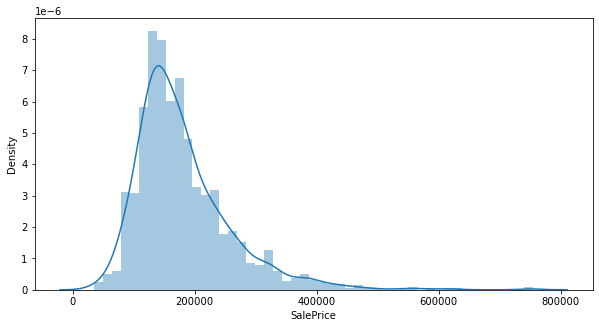

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


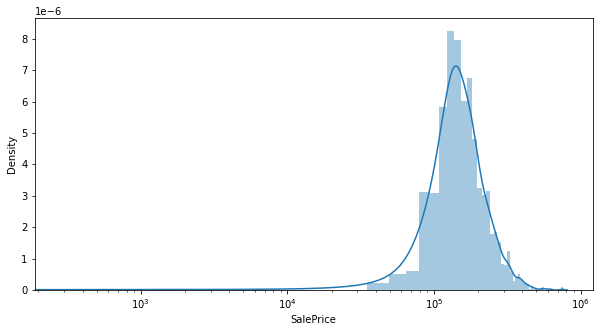

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


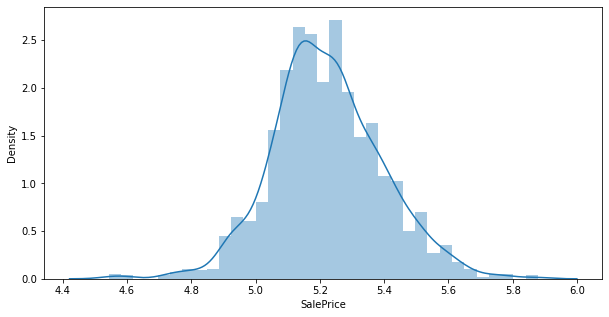

In [41]:
# Distribution of the house prices - Lognormal distribution
sn.distplot(train_raw.SalePrice)
plt.show()

sn.distplot(train_raw.SalePrice)
plt.xscale('log')
plt.show()

sn.distplot(np.log10(train_raw.SalePrice))
plt.show()

In [42]:
# Any outliers?
SalePrice_log10 = pd.DataFrame(np.log10(train_raw.SalePrice))
Outliers_3SD = SalePrice_log10[abs(SalePrice_log10.SalePrice-SalePrice_log10.SalePrice.mean())/SalePrice_log10.SalePrice.std() > 3]
print('Number of outliers: %s' %(Outliers_3SD.shape[0]))
Outliers_3SD

Number of outliers: 12


,SalePrice
30,4.602060
440,5.744293
495,4.542825
533,4.594393
691,5.877947
803,5.765619
898,5.786508
916,4.547910
968,4.578639
1046,5.745528


In [43]:
train_raw.loc[Outliers_3SD.index,:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NotAvail,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NotAvail,MnPrv,NotAvail,0,7,2008,WD,Normal,40000
440,441,20,RL,105.0,15431,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NotAvail,NotAvail,NotAvail,0,4,2009,WD,Normal,555000
495,496,30,C (all),60.0,7879,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NotAvail,NotAvail,1890.0,NotAvail,0,0,NotAvail,NotAvail,N,0,523,115,0,0,0,NotAvail,GdWo,NotAvail,0,11,2009,WD,Abnorml,34900
533,534,20,RL,50.0,5000,Pave,NotAvail,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NotAvail,NotAvail,NotAvail,NotAvail,0,NotAvail,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NotAvail,NotAvail,1890.0,NotAvail,0,0,NotAvail,NotAvail,N,0,0,0,0,0,0,NotAvail,NotAvail,NotAvail,0,1,2007,WD,Normal,39300
691,692,60,RL,104.0,21535,Pave,NotAvail,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NotAvail,NotAvail,NotAvail,0,1,2007,WD,Normal,755000
803,804,60,RL,107.0,13891,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NotAvail,NotAvail,NotAvail,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NotAvail,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NotAvail,NotAvail,NotAvail,0,3,2010,New,Partial,611657
916,917,20,C (all),50.0,9000,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NotAvail,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NotAvail,NotAvail,NotAvail,0,10,2006,WD,Abnorml,35311
968,969,50,RM,50.0,5925,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,600,600,Grav,Fa,N,SBrkr,600,368,0,968,0,0,1,0,2,1,TA,6,Typ,0,NotAvail,NotAvail,18

In [44]:
# Normality test
k2, p = stats.normaltest(SalePrice_log10)
print(k2)
print(p)

[25.50700983]
[2.89216582e-06]


In [45]:
print(SalePrice_log10.skew())
print(SalePrice_log10.kurtosis())
print(SalePrice_log10.skew()**2 + SalePrice_log10.kurtosis()**2)

SalePrice    0.121335
dtype: float64
SalePrice    0.809532
dtype: float64
SalePrice    0.670064
dtype: float64


In [47]:
Xy=pd.concat([X_dummy,np.log10(y)],axis=1)
Xy

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MasVnrType_1.0,MasVnrType_1.2,MasVnrType_1.4,MasVnrType_1.6,MasVnrType_1.8,MasVnrType_2.0,MasVnrType_2.2,MasVnrType_2.6,MasVnrType_4.0,GarageType_1.0,GarageType_2.0,GarageType_3.0,GarageType_4.0,GarageType_5.0,GarageType_6.0,Heating_1.0,Heating_2.0,Heating_3.0,Heating_4.0,Heating_5.0,RoofStyle_1.0,RoofStyle_2.0,RoofStyle_3.0,RoofStyle_4.0,RoofStyle_5.0,CentralAir_1.0,Condition2_1.0,Condition2_2.0,Condition2_3.0,Condition2_4.0,Condition2_5.0,Condition2_6.0,Condition2_7.0,SaleType_1.0,SaleType_2.0,SaleType_3.0,SaleType_4.0,SaleType_5.0,SaleType_6.0,SaleType_7.0,SaleType_8.0,...,MiscFeature_4.0,LotConfig_1.0,LotConfig_2.0,LotConfig_3.0,LotConfig_4.0,Neighborhood_1.0,Neighborhood_2.0,Neighborhood_3.0,Neighborhood_4.0,Neighborhood_5.0,Neighborhood_6.0,Neighborhood_7.0,Neighborhood_8.0,Neighborhood_9.0,Neighborhood_10.0,Neighborhood_11.0,Neighborhood_12.0,Neighborhood_13.0,Neighborhood_14.0,Neighborhood_15.0,Neighborhood_16.0,Neighborhood_17.0,Neighborhood_18.0,Neighborhood_19.0,Neighborhood_20.0,Neighborhood_21.0,Neighborhood_22.0,Neighborhood_23.0,Neighborhood_24.0,HouseStyle_1.0,HouseStyle_2.0,HouseStyle_3.0,HouseStyle_4.0,HouseStyle_5.0,HouseStyle_6.0,HouseStyle_7.0,Exterior1st_1.0,Exterior1st_2.0,Exterior1st_3.0,Exterior1st_4.0,Exterior1st_5.0,Exterior1st_6.0,Exterior1st_7.0,Exterior1st_8.0,Exterior1st_9.0,Exterior1st_10.0,Exterior1st_11.0,Exterior1st_12.0,Exterior1st_13.0,Exterior1st_14.0,Condition1_1.0,Condition1_2.0,Condition1_3.0,Condition1_4.0,Condition1_5.0,Condition1_6.0,Condition1_7.0,Condition1_8.0,Street_1.0,MSZoning_1.0,MSZoning_2.0,MSZoning_3.0,MSZoning_4.0,RoofMatl_1.0,RoofMatl_2.0,RoofMatl_3.0,RoofMatl_4.0,RoofMatl_5.0,RoofMatl_6.0,RoofMatl_7.0,Foundation_1.0,Foundation_2.0,Foundation_3.0,Foundation_4.0,Foundation_5.0,SaleCondition_1.0,SaleCondition_2.0,SaleCondition_3.0,SaleCondition_4.0,SaleCondition_5.0,BldgType_1.0,BldgType_2.0,BldgType_3.0,BldgType_4.0,Exterior2nd_1.0,Exterior2nd_2.0,Exterior2nd_3.0,Exterior2nd_4.0,Exterior2nd_5.0,Exterior2nd_6.0,Exterior2nd_7.0,Exterior2nd_8.0,Exterior2nd_9.0,Exterior2nd_10.0,Exterior2nd_11.0,Exterior2nd_12.0,Exterior2nd_13.0,Exterior2nd_14.0,Exterior2nd_15.0,SalePrice
0,60.0,65.0,8450.0,0.0,3.0,3.0,3.0,2.0,7.0,5.0,2003.0,2003.0,196.0,3.0,2.0,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,4.0,5.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,8.0,7.0,0.0,0.0,2003.0,2.0,2.0,548.0,3.0,3.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5.319106
1,20.0,80.0,9600.0,0.0,3.0,3.0,3.0,2.0,6.0,8.0,1976.0,1976.0,0.0,2.0,2.0,4.0,3.0,4.0,5.0,978.0,1.0,0.0,284.0,1262.0,4.0,5.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,2.0,6.0,7.0,1.0,3.0,1976.0,2.0,2.0,460.0,3.0,3.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5.258877
2,60.0,68.0,11250.0,0.0,2.0,3.0,3.0,2.0,7.0,5.0,2001.0,2002.0,162.0,3.0,2.0,4.

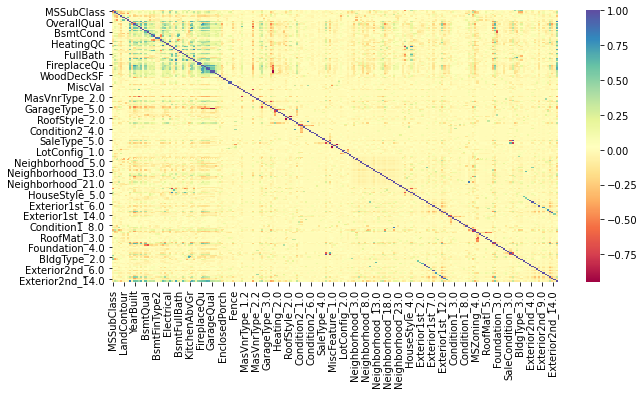

In [48]:
# Observe Crosscorrelations
corrMatrix = Xy.corr()
sn.heatmap(corrMatrix, annot=False, cmap="Spectral")
plt.show()

In [49]:
pd.DataFrame(corrMatrix.sort_values('SalePrice',ascending=False).SalePrice).head(20)

,SalePrice
SalePrice,1.000000
OverallQual,0.817184
GrLivArea,0.700927
GarageCars,0.680625
ExterQual,0.678840
KitchenQual,0.667893
GarageArea,0.650888
BsmtQual,0.615804
TotalBsmtSF,0.612134
GarageFinish,0.604878


In [50]:
pd.DataFrame(corrMatrix.sort_values('SalePrice',ascending=True).SalePrice).head(20)

,SalePrice
MasVnrType_2.0,-0.395389
GarageType_5.0,-0.388638
MSZoning_4.0,-0.347446
Foundation_1.0,-0.337815
GarageType_6.0,-0.322999
LotShape,-0.286002
Neighborhood_9.0,-0.233067
Neighborhood_17.0,-0.232243
Neighborhood_7.0,-0.211693
SaleType_8.0,-0.211679


In [52]:
corrMatrix = X_dummy.corr()
corrMatrix_abs = pd.DataFrame(corrMatrix.abs().unstack().sort_values(kind="quicksort",ascending=False))
corrMatrix_abs.columns = ['rho']
corrMatrix_abs = corrMatrix_abs[corrMatrix_abs.rho < 1]
print(corrMatrix_abs[corrMatrix_abs.rho >= 0.5].iloc[::2].shape[0])
corrMatrix_abs[corrMatrix_abs.rho >= 0.5].iloc[::2]

130


,,rho
SaleType_6.0,SaleCondition_5.0,0.986819
Exterior2nd_13.0,Exterior1st_12.0,0.977525
Exterior2nd_5.0,Exterior1st_5.0,0.974171
Exterior1st_8.0,Exterior2nd_8.0,0.973065
GarageQual,GarageCond,0.959172
MiscFeature_3.0,MiscFeature_1.0,0.950890
GarageCond,GarageType_6.0,0.946245
GarageType_6.0,GarageQual,0.942499
RoofStyle_3.0,RoofStyle_1.0,0.933462
PoolQC,PoolArea,0.899924


In [53]:
corrMatrix = X_label.corr()
corrMatrix_abs = pd.DataFrame(corrMatrix.abs().unstack().sort_values(kind="quicksort",ascending=False))
corrMatrix_abs.columns = ['rho']
corrMatrix_abs = corrMatrix_abs[corrMatrix_abs.rho < 1]
print(corrMatrix_abs[corrMatrix_abs.rho >= 0.5].iloc[::2].shape[0])
corrMatrix_abs[corrMatrix_abs.rho >= 0.5].iloc[::2]


76


,,rho
GarageCond,GarageQual,0.959172
PoolArea,PoolQC,0.899924
GarageCars,GarageArea,0.882475
Fireplaces,FireplaceQu,0.863241
Exterior1st,Exterior2nd,0.854163
GrLivArea,TotRmsAbvGrd,0.825489
TotalBsmtSF,1stFlrSF,0.819530
BsmtFinSF2,BsmtFinType2,0.788986
BldgType,MSSubClass,0.746063
GarageYrBlt,YearBuilt,0.745410


In [56]:
corrMatrix = X_dummy.corr()
corrMatrix_pos = pd.DataFrame(corrMatrix.unstack().sort_values(kind="quicksort",ascending=False))
corrMatrix_pos.columns = ['rho']
corrMatrix_pos = corrMatrix_pos[corrMatrix_pos.rho < 1]
print(corrMatrix_pos[corrMatrix_pos.rho >= 0.5].iloc[::2].shape[0])
corrMatrix_pos[corrMatrix_pos.rho >= 0.5].iloc[::2]

106


,,rho
SaleCondition_5.0,SaleType_6.0,0.986819
Exterior1st_12.0,Exterior2nd_13.0,0.977525
Exterior1st_5.0,Exterior2nd_5.0,0.974171
Exterior1st_8.0,Exterior2nd_8.0,0.973065
GarageQual,GarageCond,0.959172
PoolArea,PoolQC,0.899924
Exterior1st_6.0,Exterior2nd_6.0,0.883271
GarageArea,GarageCars,0.882475
Fireplaces,FireplaceQu,0.863241
Neighborhood_21.0,MSZoning_1.0,0.862807


In [64]:
corrMatrix = X_dummy.corr()
corrMatrix_neg = pd.DataFrame(corrMatrix.unstack().sort_values(kind="quicksort",ascending=True))
corrMatrix_neg.columns = ['rho']
corrMatrix_neg = corrMatrix_pos[corrMatrix_pos.rho < 1]
print(corrMatrix_neg[corrMatrix_neg.rho <= -0.5].iloc[::2].shape[0])
corrMatrix_neg[corrMatrix_neg.rho <= -0.5].iloc[::2].sort_values(by='rho',ascending=True)

24


,,rho
MiscFeature_3.0,MiscFeature_1.0,-0.950890
GarageType_6.0,GarageCond,-0.946245
GarageQual,GarageType_6.0,-0.942499
RoofStyle_3.0,RoofStyle_1.0,-0.933462
MSZoning_4.0,MSZoning_3.0,-0.808585
MasVnrType_2.0,MasVnrType_1.0,-0.797225
HouseStyle_2.0,2ndFlrSF,-0.788749
Foundation_1.0,Foundation_2.0,-0.781558
SaleType_8.0,SaleType_6.0,-0.773680
SaleCondition_5.0,SaleType_8.0,-0.769559
